In [ ]:
# Importing necessary libraries for data handling, preprocessing, model building, and evaluation
import pandas as pd  # For loading and manipulating datasets
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical data
from keras.models import Sequential  # For building a sequential neural network model
from keras.layers import Dense  # For adding fully connected (dense) layers in the neural network
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance


In [ ]:
# Mounting Google Drive to access files and datasets stored in Google Drive within the Colab environment
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Importing pandas library for data manipulation
import pandas as pd

# Google Drive link to the dataset
direct_link = 'https://drive.google.com/uc?id=1Kd9Aw1_xAdobirmXt6wSeC-maxHy4vd2'

# Loading the dataset from the provided Google Drive link into a pandas DataFrame
# Using 'ISO-8859-1' encoding to handle special characters in the data
data = pd.read_csv(direct_link, encoding='ISO-8859-1')

# Displaying the first few rows of the dataset to inspect the data
data.head()


,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [ ]:
print(data.shape)


(13464, 55)


In [ ]:
# Dropping rows where 'GAD_T', 'SWL_T', or 'SPIN_T' have missing values
data = data.dropna(subset=['GAD_T', 'SWL_T', 'SPIN_T'])

# Filling missing values in the 'Hours' column with the column mean
data['Hours'] = data['Hours'].fillna(data['Hours'].mean())

# Function to categorize anxiety levels based on the 'GAD_T' score
def categorize_anxiety(score):
    if score <= 4:
        return 'Minimal'
    elif score <= 9:
        return 'Mild'
    elif score <= 14:
        return 'Moderate'
    else:
        return 'Severe'

# Applying the categorize_anxiety function to the 'GAD_T' column to create a new column 'Anxiety_Level'
data['Anxiety_Level'] = data['GAD_T'].apply(categorize_anxiety)

# Displaying the first few rows of relevant columns: 'GAD_T', 'Anxiety_Level', and 'Hours'
data[['GAD_T', 'Anxiety_Level', 'Hours']].head()


<ipython-input-6-55a268035c77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hours'] = data['Hours'].fillna(data['Hours'].mean())
<ipython-input-6-55a268035c77>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Anxiety_Level'] = data['GAD_T'].apply(categorize_anxiety)


,GAD_T,Anxiety_Level,Hours
0,1,Minimal,15.0
1,8,Mild,8.0
2,8,Mild,0.0
3,0,Minimal,20.0
4,14,Moderate,20.0


In [ ]:
# Importing necessary libraries for data handling, preprocessing, model building, and evaluation
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, KFold  # For splitting data and K-Fold cross-validation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import precision_score, recall_score, f1_score  # For evaluating model performance
from keras.models import Sequential  # For building a sequential neural network
from keras.layers import Dense, Dropout  # For adding fully connected and dropout layers to the neural network

# Loading dataset from Google Drive link and handling missing values in the 'Hours' column by filling with the mean
data = pd.read_csv('https://drive.google.com/uc?id=1Kd9Aw1_xAdobirmXt6wSeC-maxHy4vd2', encoding='ISO-8859-1')
data['Hours'].fillna(data['Hours'].mean(), inplace=True)  # Filling missing values in 'Hours'
data.dropna(subset=['GAD_T', 'SWL_T', 'SPIN_T'], inplace=True)  # Dropping rows with missing values in key columns

# Defining the feature matrix (X) and the target variable (y)
X = data[['Hours', 'GAD_T', 'SWL_T', 'SPIN_T']]
y = data['GAD_T'] > 10  # Binary target: True if GAD_T > 10 (high anxiety)

# Splitting the dataset into training and test sets (80% training, 20% testing)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the feature sets for better model performance
scaler = StandardScaler().fit(X_train_full)
X_train_full_scaled = scaler.transform(X_train_full)  # Scaling the training set
X_test_scaled = scaler.transform(X_test)  # Scaling the test set

# Setting up K-Fold cross-validation with 5 splits to assess model performance on different subsets of data
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy and loss scores for each fold
acc_scores = []
loss_scores = []

# Looping through each fold of cross-validation
for train_index, val_index in kf.split(X_train_full_scaled):
    # Splitting data into training and validation sets for the current fold
    X_train, X_val = X_train_full_scaled[train_index], X_train_full_scaled[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

    # Defining a simple neural network model with dropout layers to prevent overfitting
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 64 units
        Dropout(0.3),  # Dropout layer to prevent overfitting
        Dense(32, activation='relu'),  # Second hidden layer with 32 units
        Dropout(0.3),  # Dropout layer
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])

    # Compiling the model using the Adam optimizer and binary crossentropy loss
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Training the model with the training data for the current fold, using validation data for evaluation
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluating the model on the validation set and storing accuracy and loss scores
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    acc_scores.append(acc)
    loss_scores.append(loss)

# Outputting the average accuracy and loss across all folds of cross-validation
print(f"Cross-Validation - Average Accuracy: {np.mean(acc_scores)}, Average Loss: {np.mean(loss_scores)}")

# Making predictions on the test set using the trained model
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)  # Converting predicted probabilities to binary labels

# Calculating precision, recall, and F1 score for the test set predictions
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Outputting the precision, recall, and F1 score for the test set
print(f"Test Set - Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation - Average Accuracy: 1.0, Average Loss: 0.00013982231175759807
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Set - Precision: 1.0, Recall: 1.0, F1 Score: 1.0


In [ ]:
# Importing necessary layers for building a sequential LSTM neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshaping the training and test datasets to be 3D, which is required by the LSTM model
# LSTM expects input in the form of (samples, timesteps, features)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initializing a Sequential model for the LSTM network
model = Sequential()

# Adding an LSTM layer with 50 units (neurons), where the input shape corresponds to the reshaped training data
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Adding a Dropout layer with a dropout rate of 20% to reduce overfitting
model.add(Dropout(0.2))

# Adding a Dense output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compiling the model with the Adam optimizer, binary crossentropy loss, and accuracy as the evaluation metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the LSTM model for 20 epochs with a batch size of 32
# The validation set is used to monitor model performance during training
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
337/337 - 6s - 19ms/step - accuracy: 0.8515 - loss: 0.4993 - val_accuracy: 0.8567 - val_loss: 0.4106
Epoch 2/20
337/337 - 2s - 6ms/step - accuracy: 0.8552 - loss: 0.4112 - val_accuracy: 0.8567 - val_loss: 0.4101
Epoch 3/20
337/337 - 1s - 4ms/step - accuracy: 0.8552 - loss: 0.4117 - val_accuracy: 0.8567 - val_loss: 0.4097
Epoch 4/20
337/337 - 1s - 4ms/step - accuracy: 0.8550 - loss: 0.4119 - val_accuracy: 0.8567 - val_loss: 0.4092
Epoch 5/20
337/337 - 2s - 6ms/step - accuracy: 0.8551 - loss: 0.4101 - val_accuracy: 0.8567 - val_loss: 0.4093
Epoch 6/20
337/337 - 3s - 8ms/step - accuracy: 0.8550 - loss: 0.4111 - val_accuracy: 0.8567 - val_loss: 0.4089
Epoch 7/20
337/337 - 1s - 4ms/step - accuracy: 0.8550 - loss: 0.4112 - val_accuracy: 0.8567 - val_loss: 0.4091
Epoch 8/20
337/337 - 3s - 8ms/step - accuracy: 0.8550 - loss: 0.4114 - val_accuracy: 0.8567 - val_loss: 0.4088
Epoch 9/20
337/337 - 2s - 5ms/step - accuracy: 0.8550 - loss: 0.4108 - val_accuracy: 0.8567 - val_loss: 0.4089


In [ ]:
# Importing necessary libraries for data handling, preprocessing, and splitting the dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler  # For scaling numerical features
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets

# Loading the dataset from Google Drive with specified encoding to handle special characters
data = pd.read_csv('https://drive.google.com/uc?id=1Kd9Aw1_xAdobirmXt6wSeC-maxHy4vd2', encoding='ISO-8859-1')

# Filling any missing numerical values in the dataset with the column mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Initializing a StandardScaler for scaling numerical features to have mean 0 and standard deviation 1
scaler = StandardScaler()

# Selecting the numerical features 'Hours' and 'Age' for scaling
numerical_features = ['Hours', 'Age']
data[numerical_features] = scaler.fit_transform(data[numerical_features])  # Applying scaling to the selected features

# Defining the feature set (X) and the target variable (y)
# 'y' is a binary variable, True if the 'GAD_T' score is greater than 10 (indicating higher anxiety)
X = data[numerical_features]
y = data['GAD_T'] > 10

# Splitting the dataset into training (80%) and testing (20%) sets, ensuring reproducibility with random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Evaluating the trained model on the test set to calculate the loss and accuracy
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=2)

# Printing the test loss and accuracy to assess the model's performance on unseen data
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


85/85 - 0s - 2ms/step - accuracy: 0.8570 - loss: 0.4084
Test Loss: 0.4084364175796509, Test Accuracy: 0.8570367693901062


In [ ]:

history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)


Epoch 1/20
337/337 - 2s - 5ms/step - accuracy: 0.8551 - loss: 0.4105 - val_accuracy: 0.8570 - val_loss: 0.4086
Epoch 2/20
337/337 - 1s - 4ms/step - accuracy: 0.8551 - loss: 0.4107 - val_accuracy: 0.8570 - val_loss: 0.4084
Epoch 3/20
337/337 - 3s - 7ms/step - accuracy: 0.8552 - loss: 0.4111 - val_accuracy: 0.8570 - val_loss: 0.4084
Epoch 4/20
337/337 - 3s - 9ms/step - accuracy: 0.8551 - loss: 0.4107 - val_accuracy: 0.8570 - val_loss: 0.4083
Epoch 5/20
337/337 - 2s - 7ms/step - accuracy: 0.8551 - loss: 0.4107 - val_accuracy: 0.8570 - val_loss: 0.4084
Epoch 6/20
337/337 - 2s - 5ms/step - accuracy: 0.8552 - loss: 0.4108 - val_accuracy: 0.8570 - val_loss: 0.4083
Epoch 7/20
337/337 - 3s - 8ms/step - accuracy: 0.8551 - loss: 0.4111 - val_accuracy: 0.8570 - val_loss: 0.4083
Epoch 8/20
337/337 - 3s - 8ms/step - accuracy: 0.8551 - loss: 0.4107 - val_accuracy: 0.8570 - val_loss: 0.4083
Epoch 9/20
337/337 - 2s - 7ms/step - accuracy: 0.8551 - loss: 0.4109 - val_accuracy: 0.8570 - val_loss: 0.4083
E

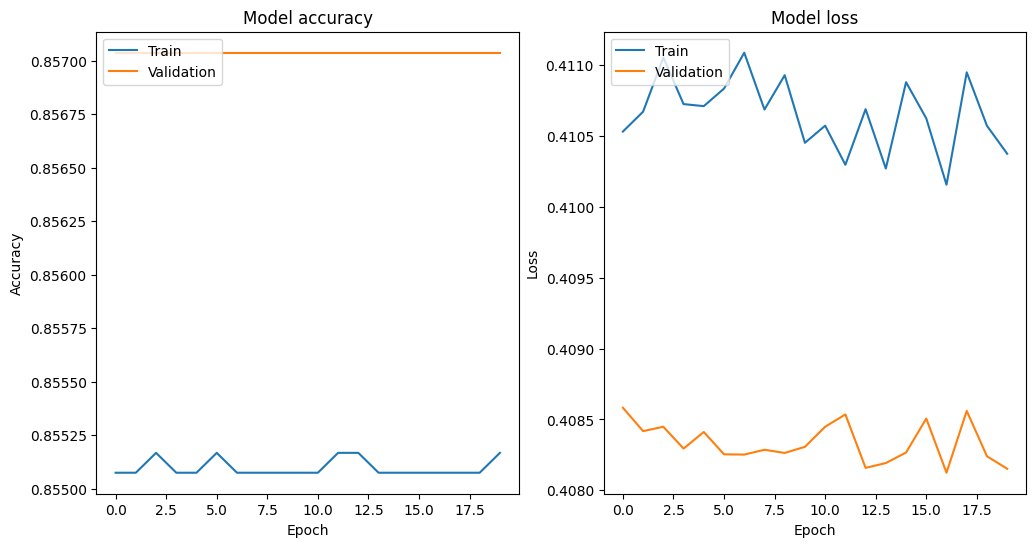

In [ ]:
# Importing the matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Function to plot the training history of the model, including accuracy and loss for both training and validation sets
def plot_training_history(history):

    # Creating a new figure with a specified size for the plots
    plt.figure(figsize=(12, 6))

    # Subplot 1: Plotting accuracy over epochs for both training and validation sets
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])  # Training accuracy
    plt.plot(history.history['val_accuracy'])  # Validation accuracy
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')  # Adding a legend for clarity

    # Subplot 2: Plotting loss over epochs for both training and validation sets
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])  # Training loss
    plt.plot(history.history['val_loss'])  # Validation loss
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')  # Adding a legend for clarity

    # Displaying the plots
    plt.show()

# Calling the function to plot the accuracy and loss from the training history
plot_training_history(history)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Importing necessary layers for building a 1D Convolutional Neural Network (CNN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Initializing a Sequential model for 1D CNN
model = Sequential()

# Adding a 1D Convolutional layer with 64 filters and kernel size of 1
# Kernel size should match or be smaller than the number of timesteps (here it's 1)
# ReLU activation is used for non-linearity
model.add(Conv1D(64, kernel_size=1, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Adding a MaxPooling layer to reduce the dimensionality and prevent overfitting
# Pool size is set to 1 as the input timesteps are small
model.add(MaxPooling1D(pool_size=1))

# Flattening the 3D output of the Conv1D layer to feed into the Dense (fully connected) layer
model.add(Flatten())

# Adding a Dense output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compiling the model using the Adam optimizer, binary crossentropy loss for binary classification, and tracking accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with the reshaped training data, validating on the reshaped test set
# Running for 20 epochs with a batch size of 32, and verbose=2 for detailed output during training
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=2)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


337/337 - 3s - 10ms/step - accuracy: 0.8451 - loss: 0.4675 - val_accuracy: 0.8570 - val_loss: 0.4149
Epoch 2/20
337/337 - 1s - 2ms/step - accuracy: 0.8551 - loss: 0.4119 - val_accuracy: 0.8567 - val_loss: 0.4177
Epoch 3/20
337/337 - 1s - 4ms/step - accuracy: 0.8551 - loss: 0.4106 - val_accuracy: 0.8567 - val_loss: 0.4191
Epoch 4/20
337/337 - 1s - 4ms/step - accuracy: 0.8551 - loss: 0.4102 - val_accuracy: 0.8567 - val_loss: 0.4193
Epoch 5/20
337/337 - 1s - 2ms/step - accuracy: 0.8551 - loss: 0.4099 - val_accuracy: 0.8567 - val_loss: 0.4199
Epoch 6/20
337/337 - 1s - 4ms/step - accuracy: 0.8551 - loss: 0.4103 - val_accuracy: 0.8567 - val_loss: 0.4198
Epoch 7/20
337/337 - 1s - 2ms/step - accuracy: 0.8551 - loss: 0.4100 - val_accuracy: 0.8567 - val_loss: 0.4187
Epoch 8/20
337/337 - 1s - 2ms/step - accuracy: 0.8551 - loss: 0.4099 - val_accuracy: 0.8567 - val_loss: 0.4173
Epoch 9/20
337/337 - 1s - 2ms/step - accuracy: 0.8551 - loss: 0.4094 - val_accuracy: 0.8567 - val_loss: 0.4183
Epoch 10/20

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


337/337 - 9s - 28ms/step - accuracy: 0.8324 - loss: 0.5017 - val_accuracy: 0.8570 - val_loss: 0.4371
Epoch 2/50
337/337 - 3s - 8ms/step - accuracy: 0.8552 - loss: 0.4331 - val_accuracy: 0.8570 - val_loss: 0.4217
Epoch 3/50
337/337 - 1s - 2ms/step - accuracy: 0.8552 - loss: 0.4229 - val_accuracy: 0.8570 - val_loss: 0.4152
Epoch 4/50
337/337 - 1s - 4ms/step - accuracy: 0.8552 - loss: 0.4213 - val_accuracy: 0.8570 - val_loss: 0.4132
Epoch 5/50
337/337 - 1s - 4ms/step - accuracy: 0.8552 - loss: 0.4197 - val_accuracy: 0.8570 - val_loss: 0.4113
Epoch 6/50
337/337 - 1s - 2ms/step - accuracy: 0.8552 - loss: 0.4178 - val_accuracy: 0.8570 - val_loss: 0.4107
Epoch 7/50
337/337 - 1s - 2ms/step - accuracy: 0.8552 - loss: 0.4200 - val_accuracy: 0.8570 - val_loss: 0.4100
Epoch 8/50
337/337 - 1s - 2ms/step - accuracy: 0.8552 - loss: 0.4198 - val_accuracy: 0.8570 - val_loss: 0.4102
Epoch 9/50
337/337 - 1s - 2ms/step - accuracy: 0.8552 - loss: 0.4182 - val_accuracy: 0.8570 - val_loss: 0.4108
Epoch 10/50

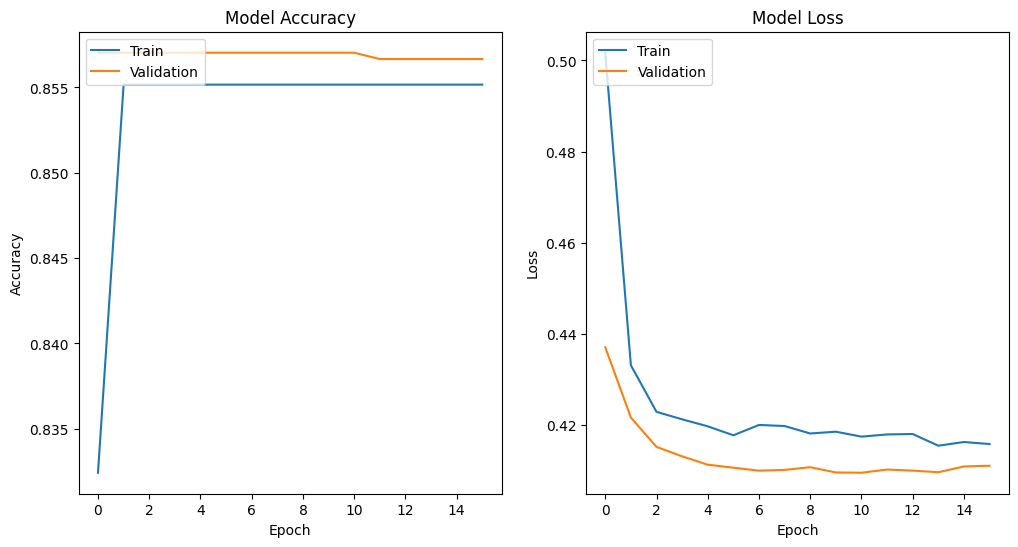

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Loading and preprocessing the dataset
data = pd.read_csv('https://drive.google.com/uc?id=1Kd9Aw1_xAdobirmXt6wSeC-maxHy4vd2', encoding='ISO-8859-1')
data.fillna(data.mean(numeric_only=True), inplace=True)

# Defining the features and target variable
X = data[['Hours', 'Age']]
y = data['GAD_T'] > 10  # Binary target (GAD_T > 10)

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Augment the features by repeating them to ensure we have enough features for multiple time steps
X_train_augmented = np.hstack([X, X])  # Repeat the features to create more
X_test_augmented = np.hstack([X, X])

# Split the augmented data into training and test sets
X_train_augmented, X_test_augmented, y_train, y_test = train_test_split(X_train_augmented, y, test_size=0.2, random_state=42)

# Reshape the data for multiple time steps (e.g., 2 time steps)
num_time_steps = 2
X_train_reshaped = X_train_augmented.reshape((X_train_augmented.shape[0], num_time_steps, X_train_augmented.shape[1] // num_time_steps))
X_test_reshaped = X_test_augmented.reshape((X_test_augmented.shape[0], num_time_steps, X_test_augmented.shape[1] // num_time_steps))

# Build the CNN model with smaller kernel size (1) and adjusted pool_size (1)
model = Sequential()
model.add(Conv1D(256, kernel_size=1, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(MaxPooling1D(pool_size=1))  # Adjusted pool_size to 1
model.add(Dropout(0.5))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))  # Adjusted pool_size to 1
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model using Adam optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test),
                    callbacks=[early_stopping], verbose=2)

# Evaluating the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_training_history(history)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

# Loading and preprocessing the dataset
data = pd.read_csv('https://drive.google.com/uc?id=1Kd9Aw1_xAdobirmXt6wSeC-maxHy4vd2', encoding='ISO-8859-1')
data.fillna(data.mean(numeric_only=True), inplace=True)

# Feature Engineering: Adding additional features
data['Age_Hours'] = data['Hours'] * data['Age']  # Interaction term
data['Hours_Squared'] = data['Hours'] ** 2  # Quadratic term
data['Age_Squared'] = data['Age'] ** 2  # Quadratic term

# Defining features and target
X = data[['Hours', 'Age', 'Age_Hours', 'Hours_Squared', 'Age_Squared']]
y = data['GAD_T'] > 10  # Binary target

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardize the features (use pipeline for Logistic Regression and Random Forest)
scaler = StandardScaler()

### 1. Logistic Regression with Cross-Validation and Hyperparameter Tuning

# Create a pipeline with standardization and logistic regression
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Use GridSearchCV to find the best hyperparameters
logreg_grid = GridSearchCV(log_reg_pipeline, logreg_param_grid, cv=5, scoring='accuracy', verbose=2)
logreg_grid.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters for Logistic Regression: {logreg_grid.best_params_}")
print(f"Best cross-validation accuracy for Logistic Regression: {logreg_grid.best_score_}")

# Test the best Logistic Regression model on the test set
y_pred_logreg = logreg_grid.predict(X_test)
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))

### 2. Random Forest with Cross-Validation and Hyperparameter Tuning

# Create a pipeline for Random Forest (no need for standardization here)
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', verbose=2)
rf_grid.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best parameters for Random Forest: {rf_grid.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {rf_grid.best_score_}")

# Test the best Random Forest model on the test set
y_pred_rf = rf_grid.predict(X_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................logreg__C=0.001; total time=   0.0s
[CV] END ....................................logreg__C=0.001; total time=   0.0s
[CV] END ....................................logreg__C=0.001; total time=   0.0s
[CV] END ....................................logreg__C=0.001; total time=   0.0s
[CV] END ....................................logreg__C=0.001; total time=   0.0s
[CV] END .....................................logreg__C=0.01; total time=   0.0s
[CV] END .....................................logreg__C=0.01; total time=   0.0s
[CV] END .....................................logreg__C=0.01; total time=   0.0s
[CV] END .....................................logreg__C=0.01; total time=   0.0s
[CV] END .....................................logreg__C=0.01; total time=   0.0s
[CV] END ......................................logreg__C=0.1; total time=   0.0s
[CV] END ......................................lo

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create Voting Classifier (combine Logistic Regression and Random Forest)
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg_grid.best_estimator_),
    ('rf', rf_grid.best_estimator_)
], voting='soft')  # Use 'soft' voting to combine probabilities

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Test Voting Classifier on the test set
y_pred_voting = voting_clf.predict(X_test)
print(f"Voting Classifier Test Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))


In [ ]:
from xgboost import XGBClassifier

# Create XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning can also be done here
xgb.fit(X_train, y_train)

# Predict and evaluate XGBoost model
y_pred_xgb = xgb.predict(X_test)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))


In [ ]:
from sklearn.ensemble import StackingClassifier

# Create Stacking Classifier (with Logistic Regression as final estimator)
stacking_clf = StackingClassifier(estimators=[
    ('logreg', logreg_grid.best_estimator_),
    ('rf', rf_grid.best_estimator_)
], final_estimator=LogisticRegression())

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test)
print(f"Stacking Classifier Test Accuracy: {accuracy_score(y_test, y_pred_stacking)}")
print(classification_report(y_test, y_pred_stacking))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load and preprocess the dataset
data = pd.read_csv('https://drive.google.com/uc?id=1Kd9Aw1_xAdobirmXt6wSeC-maxHy4vd2', encoding='ISO-8859-1')
data.fillna(data.mean(numeric_only=True), inplace=True)

# Feature Engineering: Adding additional features
data['Age_Hours'] = data['Hours'] * data['Age']
data['Hours_Squared'] = data['Hours'] ** 2
data['Age_Squared'] = data['Age'] ** 2

# Define features and target
X = data[['Hours', 'Age', 'Age_Hours', 'Hours_Squared', 'Age_Squared']]
y = data['GAD_T'] > 10  # Binary target

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Polynomial Feature Expansion with reduced degree
poly = PolynomialFeatures(degree=1, include_bias=False)  # Set degree to 1 for speedup

# Pipeline for Logistic Regression with polynomial features
logreg_pipeline = Pipeline([
    ('poly', poly),  # Add polynomial features
    ('scaler', StandardScaler()),  # Scale the features
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Reduced hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'logreg__C': [0.01, 0.1, 1],  # Reduced range for regularization strength
    'logreg__penalty': ['l1', 'l2'],  # Different penalties
    'logreg__solver': ['liblinear']  # Required when using L1 penalty
}

# Grid Search CV for Logistic Regression with reduced search space
logreg_grid = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=3, scoring='accuracy', verbose=2)
logreg_grid.fit(X_train, y_train)

# Test accuracy and classification report
y_pred_logreg = logreg_grid.predict(X_test)
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END logreg__C=0.01, logreg__penalty=l1, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__penalty=l1, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__penalty=l1, logreg__solver=liblinear; total time=   0.1s
[CV] END logreg__C=0.01, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.01, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.1, logreg__penalty=l1, logreg__solver=liblinear; total time=   0.1s
[CV] END logreg__C=0.1, logreg__penalty=l1, logreg__solver=liblinear; total time=   0.1s
[CV] END logreg__C=0.1, logreg__penalty=l1, logreg__solver=liblinear; total time=   0.1s
[CV] END logreg__C=0.1, logreg__penalty=l2, logreg__solver=liblinear; total time=   0.0s
[CV] END logreg__C=0.1, logreg__penalty=l2, 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 500],  # Increase number of trees
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy', verbose=2)
rf_grid.fit(X_train, y_train)

# Best Random Forest model
best_rf = rf_grid.best_estimator_

# Stacking Classifier (combine Logistic Regression and Random Forest)
stacking_clf = StackingClassifier(estimators=[
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', best_rf)
], final_estimator=LogisticRegression())

# Fit the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Test Stacking Classifier on test set
y_pred_stacking = stacking_clf.predict(X_test)
print(f"Stacking Classifier Test Accuracy: {accuracy_score(y_test, y_pred_stacking)}")
print(classification_report(y_test, y_pred_stacking))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   4.4s
[CV] END max_depth=10, min_s

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Limiting multithreading issues
os.environ["OMP_NUM_THREADS"] = "1"  # Limit OpenMP to 1 thread
os.environ["MKL_NUM_THREADS"] = "1"  # Limit MKL to 1 thread

# Loading and preprocessing the dataset
data = pd.read_csv('https://drive.google.com/uc?id=1Kd9Aw1_xAdobirmXt6wSeC-maxHy4vd2', encoding='ISO-8859-1')
data.fillna(data.mean(numeric_only=True), inplace=True)

# Feature Engineering
data['Age_Hours'] = data['Hours'] * data['Age']
data['Hours_Squared'] = data['Hours'] ** 2
data['Age_Squared'] = data['Age'] ** 2

# Defining features and target
X = data[['Hours', 'Age', 'Age_Hours', 'Hours_Squared', 'Age_Squared']]
y = data['GAD_T'] > 10

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardize the data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. RandomizedSearchCV for Random Forest
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter space for Random Forest
rf_param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV to find the best hyperparameters (with n_jobs=1 to avoid multithreading issue)
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_distributions,
                                      n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=1)  # Set n_jobs=1
rf_random_search.fit(X_train, y_train)

# Best Random Forest model
best_rf = rf_random_search.best_estimator_

# 2. Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# 3. Stacking Classifier (combine Logistic Regression, Random Forest, and XGBoost)
stacking_clf = StackingClassifier(estimators=[
    ('logreg', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', best_rf),
    ('xgb', xgb)
], final_estimator=LogisticRegression())

# Fit the Stacking Classifier
stacking_clf.fit(X_train_scaled, y_train)

# Evaluate Stacking Classifier on test set
y_pred_stacking = stacking_clf.predict(X_test_scaled)
print(f"Stacking Classifier Test Accuracy: {accuracy_score(y_test, y_pred_stacking)}")
print(classification_report(y_test, y_pred_stacking))

# Evaluate Random Forest on test set
y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Evaluate XGBoost on test set
y_pred_xgb = xgb.predict(X_test)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   6.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   4.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   6.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total tim

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming X_train and X_test have already been defined and scaled

# Reshaping the data for LSTM (samples, timesteps, features)
# Assuming each sample has 1 time step and the features are in X_train.shape[1]
X_train_reshaped = np.expand_dims(X_train, axis=1)  # Add a time dimension
X_test_reshaped = np.expand_dims(X_test, axis=1)    # Add a time dimension

# Building a Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.3))  # Adding dropout
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compiling the model with a reduced learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test),
                    callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluating the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f'LSTM Test Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
257/257 - 13s - 50ms/step - accuracy: 0.9551 - loss: 0.2152 - val_accuracy: 0.9161 - val_loss: 0.3665 - learning_rate: 0.0010
Epoch 2/50
257/257 - 2s - 7ms/step - accuracy: 0.9957 - loss: 0.0206 - val_accuracy: 0.8599 - val_loss: 1.0048 - learning_rate: 0.0010
Epoch 3/50
257/257 - 1s - 5ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.7639 - val_loss: 2.1617 - learning_rate: 0.0010
Epoch 4/50
257/257 - 3s - 13ms/step - accuracy: 0.9987 - loss: 0.0063 - val_accuracy: 0.7304 - val_loss: 2.7436 - learning_rate: 0.0010
Epoch 5/50
257/257 - 1s - 6ms/step - accuracy: 0.9995 - loss: 0.0044 - val_accuracy: 0.5236 - val_loss: 4.7560 - learning_rate: 0.0010
Epoch 6/50
257/257 - 2s - 9ms/step - accuracy: 0.9995 - loss: 0.0038 - val_accuracy: 0.4323 - val_loss: 6.0421 - learning_rate: 0.0010
Epoch 7/50
257/257 - 3s - 10ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.4311 - val_loss: 6.1473 - learning_rate: 2.0000e-04
Epoch 8/50
257/257 - 3s - 10ms/step - accuracy:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Building a simplified CNN model
model = Sequential()

# First convolutional layer with fewer filters
model.add(Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.6))  # Increased dropout

# Second convolutional layer with fewer filters
model.add(Conv1D(64, kernel_size=1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))  # Increased dropout

# Flattening layer before dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))  # Increased dropout

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=1e-5)  # Reduced initial learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)

# Train the model with a larger batch size
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_data=(X_test_reshaped, y_test),
                    callbacks=[early_stopping, reduce_lr], verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=2)
print(f'CNN Test Accuracy: {accuracy}')


Epoch 1/50
129/129 - 9s - 70ms/step - accuracy: 0.5852 - loss: 1.0236 - val_accuracy: 0.8506 - val_loss: 1.8548 - learning_rate: 1.0000e-05
Epoch 2/50
129/129 - 1s - 5ms/step - accuracy: 0.6004 - loss: 0.9648 - val_accuracy: 0.8506 - val_loss: 2.9355 - learning_rate: 1.0000e-05
Epoch 3/50
129/129 - 1s - 5ms/step - accuracy: 0.6114 - loss: 0.9527 - val_accuracy: 0.8506 - val_loss: 3.7312 - learning_rate: 1.0000e-05
Epoch 4/50
129/129 - 1s - 8ms/step - accuracy: 0.6169 - loss: 0.9447 - val_accuracy: 0.8506 - val_loss: 4.3395 - learning_rate: 2.0000e-06
81/81 - 0s - 1ms/step - accuracy: 0.8506 - loss: 1.8548
CNN Test Accuracy: 0.8505657315254211


In [ ]:
!pip install graphviz


In [ ]:
!pip install matplotlib seaborn


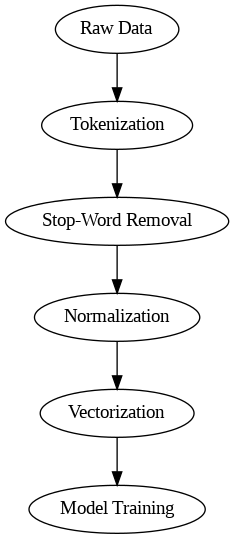

In [ ]:
from graphviz import Digraph

# Create a flowchart
dot = Digraph()

# Adding nodes
dot.node('A', 'Raw Data')
dot.node('B', 'Tokenization')
dot.node('C', 'Stop-Word Removal')
dot.node('D', 'Normalization')
dot.node('E', 'Vectorization')
dot.node('F', 'Model Training')

# Defining the flow
dot.edges(['AB', 'BC', 'CD', 'DE', 'EF'])

# Render and display the flowchart as a PNG image
dot.render('data_pipeline_flowchart', format='png')

# Display the image
from IPython.display import Image
Image('data_pipeline_flowchart.png')


In [ ]:
!pip install tensorflow pydot graphviz


In [ ]:
from tensorflow.keras.utils import plot_model


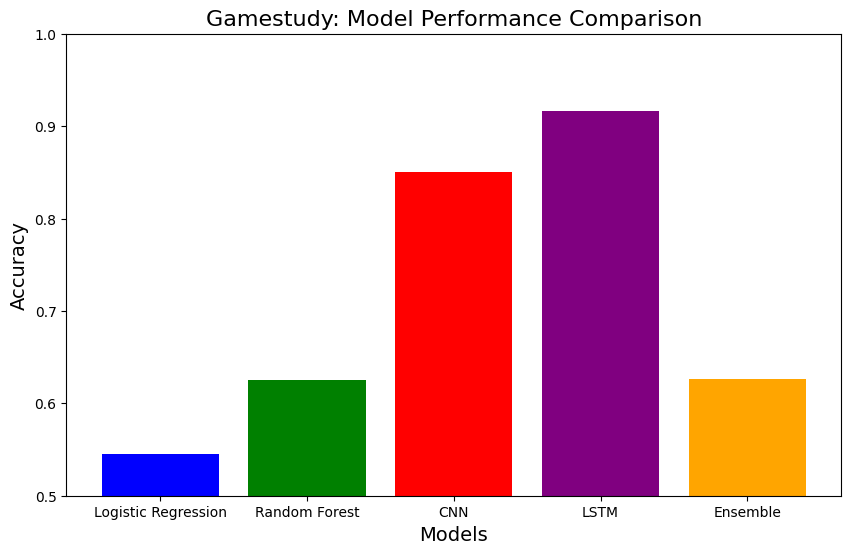

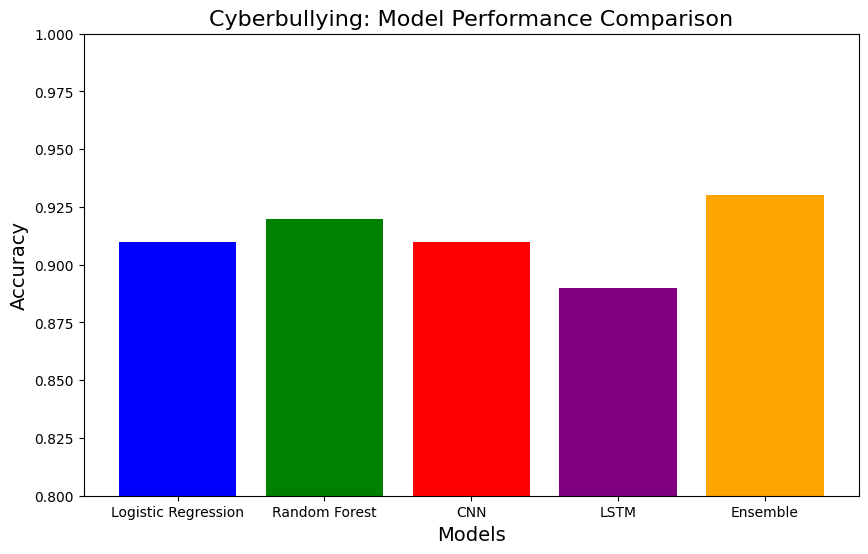

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their respective accuracies for each study
models = ['Logistic Regression', 'Random Forest', 'CNN', 'LSTM', 'Ensemble']

# Gamestudy accuracies (final results based on our discussion and your paper)
gamestudy_accuracies = [0.5454, 0.6254, 0.8506, 0.9161, 0.6259]  # Gamestudy results

# Cyberbullying accuracies (final results based on your paper's table)
cyberbullying_accuracies = [0.91, 0.92, 0.91, 0.89, 0.93]  # Cyberbullying results

# Plotting Gamestudy results
plt.figure(figsize=(10, 6))
plt.bar(models, gamestudy_accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Gamestudy: Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.5, 1.0)
plt.show()

# Plotting Cyberbullying results
plt.figure(figsize=(10, 6))
plt.bar(models, cyberbullying_accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Cyberbullying: Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.8, 1.0)
plt.show()

# Now for visualizing the LSTM architecture (assuming the same model architecture as discussed)
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Example LSTM model structure
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(10, 1)))  # Adjust input shape based on your data
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Save the LSTM architecture diagram
plot_model(model, to_file='lstm_model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Install necessary packages
!apt-get install graphviz
!pip install pydot
!pip install keras


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
from keras.utils import plot_model  # Correct import path in newer versions of Keras


In [ ]:
!apt-get install graphviz
!pip install pydot
!pip install keras
!pip install tensorflow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


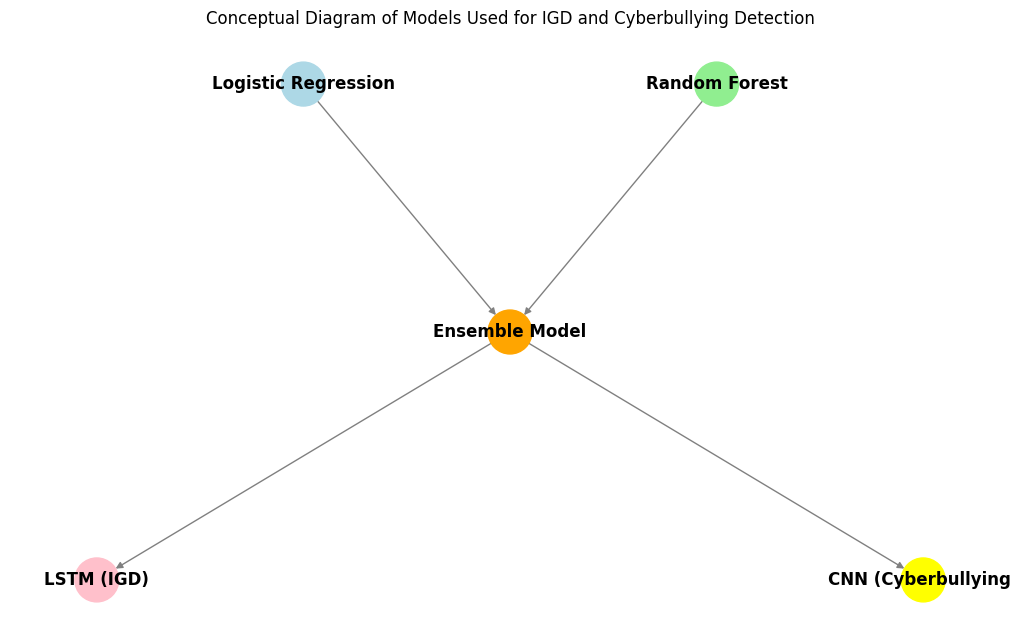

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing the models
G.add_node("Logistic Regression", pos=(0, 1), color='lightblue', size=1000)
G.add_node("Random Forest", pos=(2, 1), color='lightgreen', size=1000)
G.add_node("Ensemble Model", pos=(1, 0.5), color='orange', size=1000)
G.add_node("LSTM (IGD)", pos=(-1, 0), color='pink', size=1000)
G.add_node("CNN (Cyberbullying)", pos=(3, 0), color='yellow', size=1000)

# Add edges representing the relationship between models
G.add_edges_from([("Logistic Regression", "Ensemble Model"),
                  ("Random Forest", "Ensemble Model"),
                  ("Ensemble Model", "CNN (Cyberbullying)"),
                  ("Ensemble Model", "LSTM (IGD)")])

# Extract positions from the nodes for visualization
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=[G.nodes[n]['color'] for n in G.nodes],
        node_size=[G.nodes[n]['size'] for n in G.nodes], font_size=12, font_weight='bold', edge_color='gray')
plt.title("Conceptual Diagram of Models Used for IGD and Cyberbullying Detection")
plt.savefig('conceptual_model.png', format='png')
plt.show()


In [ ]:
!apt-get install graphviz
!pip install pydot
!pip install keras


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!apt-get install graphviz -y
!pip install pydot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!apt-get install graphviz -y
!pip install pydot


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install tensorflow keras


In [ ]:
!pip install keras-vis


In [ ]:
# Install necessary packages
!apt-get install graphviz -y
!pip install pydot
!pip install tensorflow keras


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


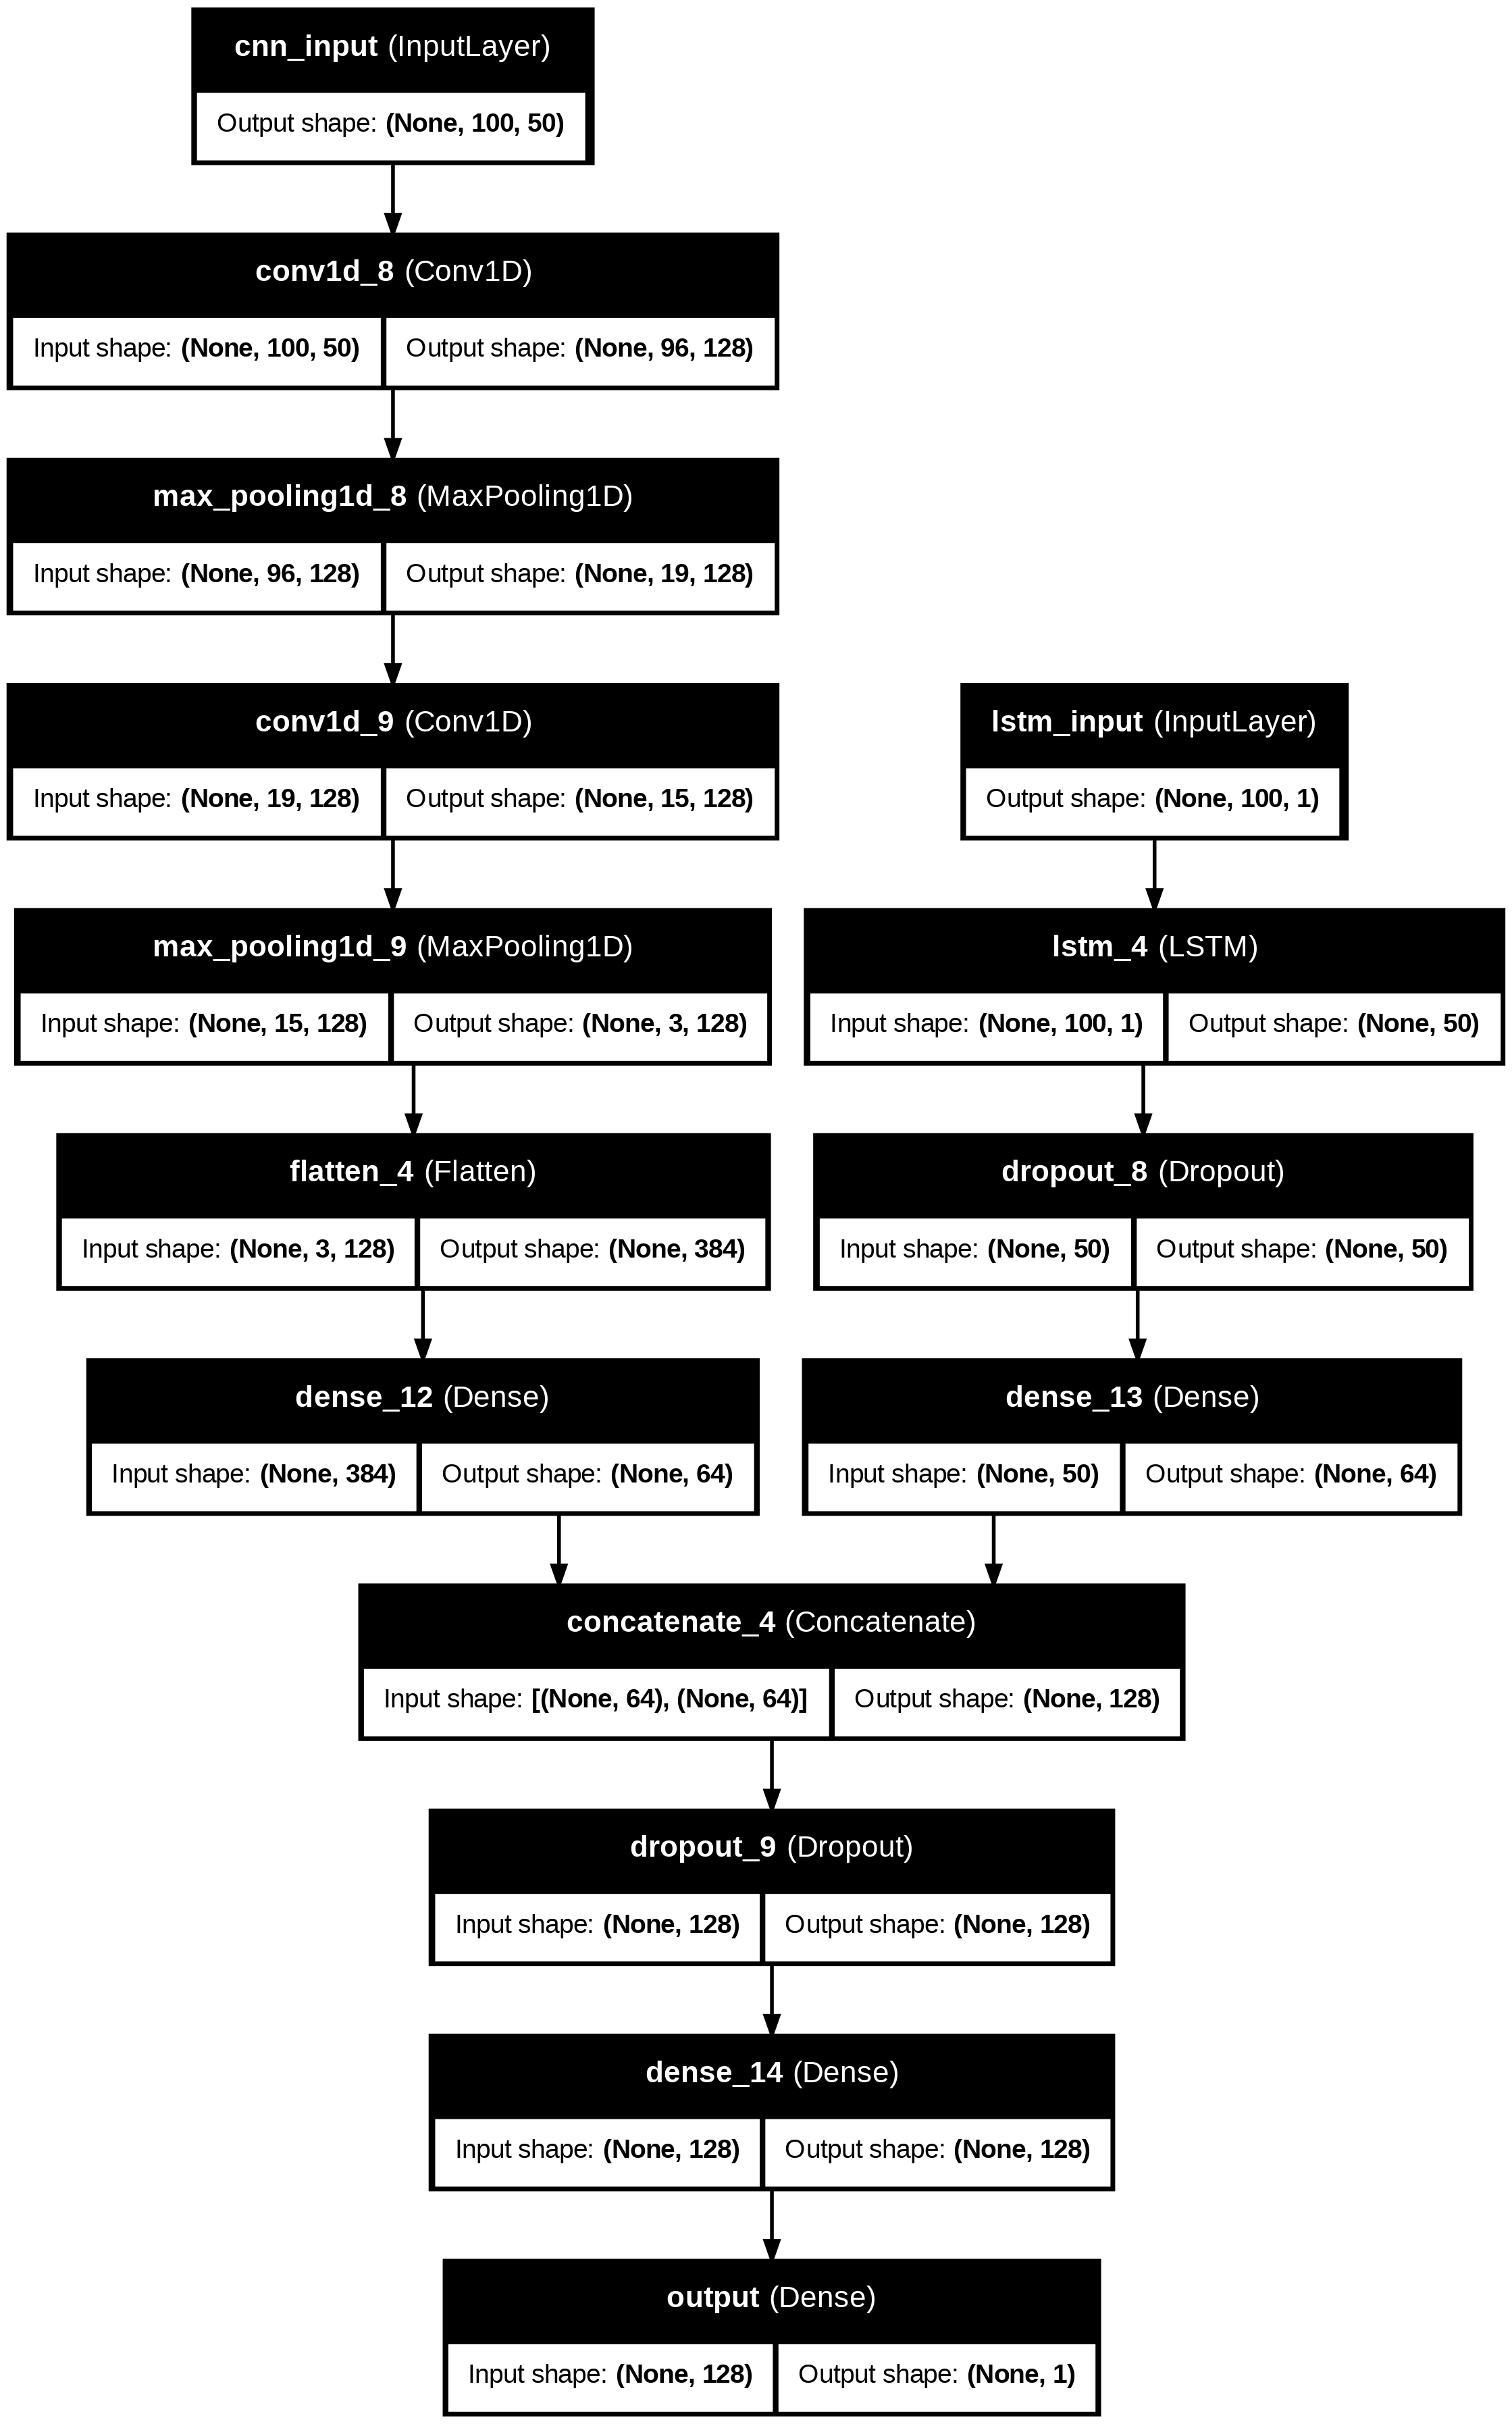

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Dense, Dropout, Flatten, concatenate

# Define CNN architecture (for Cyberbullying Text Classification)
cnn_input = Input(shape=(100, 50), name="cnn_input")  # Adjusting input shape to match (100, 50)
conv1d = Conv1D(128, 5, activation='relu')(cnn_input)  # Kernel size 5 for capturing n-grams
max_pooling1d = MaxPooling1D(pool_size=5)(conv1d)  # Pool size 5
conv1d_1 = Conv1D(128, 5, activation='relu')(max_pooling1d)  # Another Conv1D layer
max_pooling1d_1 = MaxPooling1D(pool_size=5)(conv1d_1)  # Pool size 5 for second pooling
flatten = Flatten()(max_pooling1d_1)  # Flattening the data
dense_1 = Dense(64, activation='relu')(flatten)  # Fully connected layer after CNN

# Define LSTM architecture (for IGD Sequential Data)
lstm_input = Input(shape=(100, 1), name="lstm_input")  # Adjusting input shape to (100, 1)
lstm = LSTM(50, activation='tanh', return_sequences=False)(lstm_input)  # LSTM with 50 units
dropout = Dropout(0.2)(lstm)  # Dropout layer with rate 0.2 to prevent overfitting
dense = Dense(64, activation='relu')(dropout)  # Fully connected layer after LSTM

# Concatenate CNN and LSTM outputs
concat = concatenate([dense_1, dense], axis=-1)  # Concatenating the outputs

# Add more layers after concatenation
dropout_1 = Dropout(0.5)(concat)  # Dropout layer with 0.5 rate after concatenation
dense_2 = Dense(128, activation='relu')(dropout_1)  # Fully connected layer after concatenation
output = Dense(1, activation='sigmoid', name="output")(dense_2)  # Output layer with sigmoid activation for binary classification

# Create the model
model = Model(inputs=[cnn_input, lstm_input], outputs=output)

# Visualize the model architecture
plot_model(model, to_file='deep_learning_architecture_actual.png', show_shapes=True, show_layer_names=True)


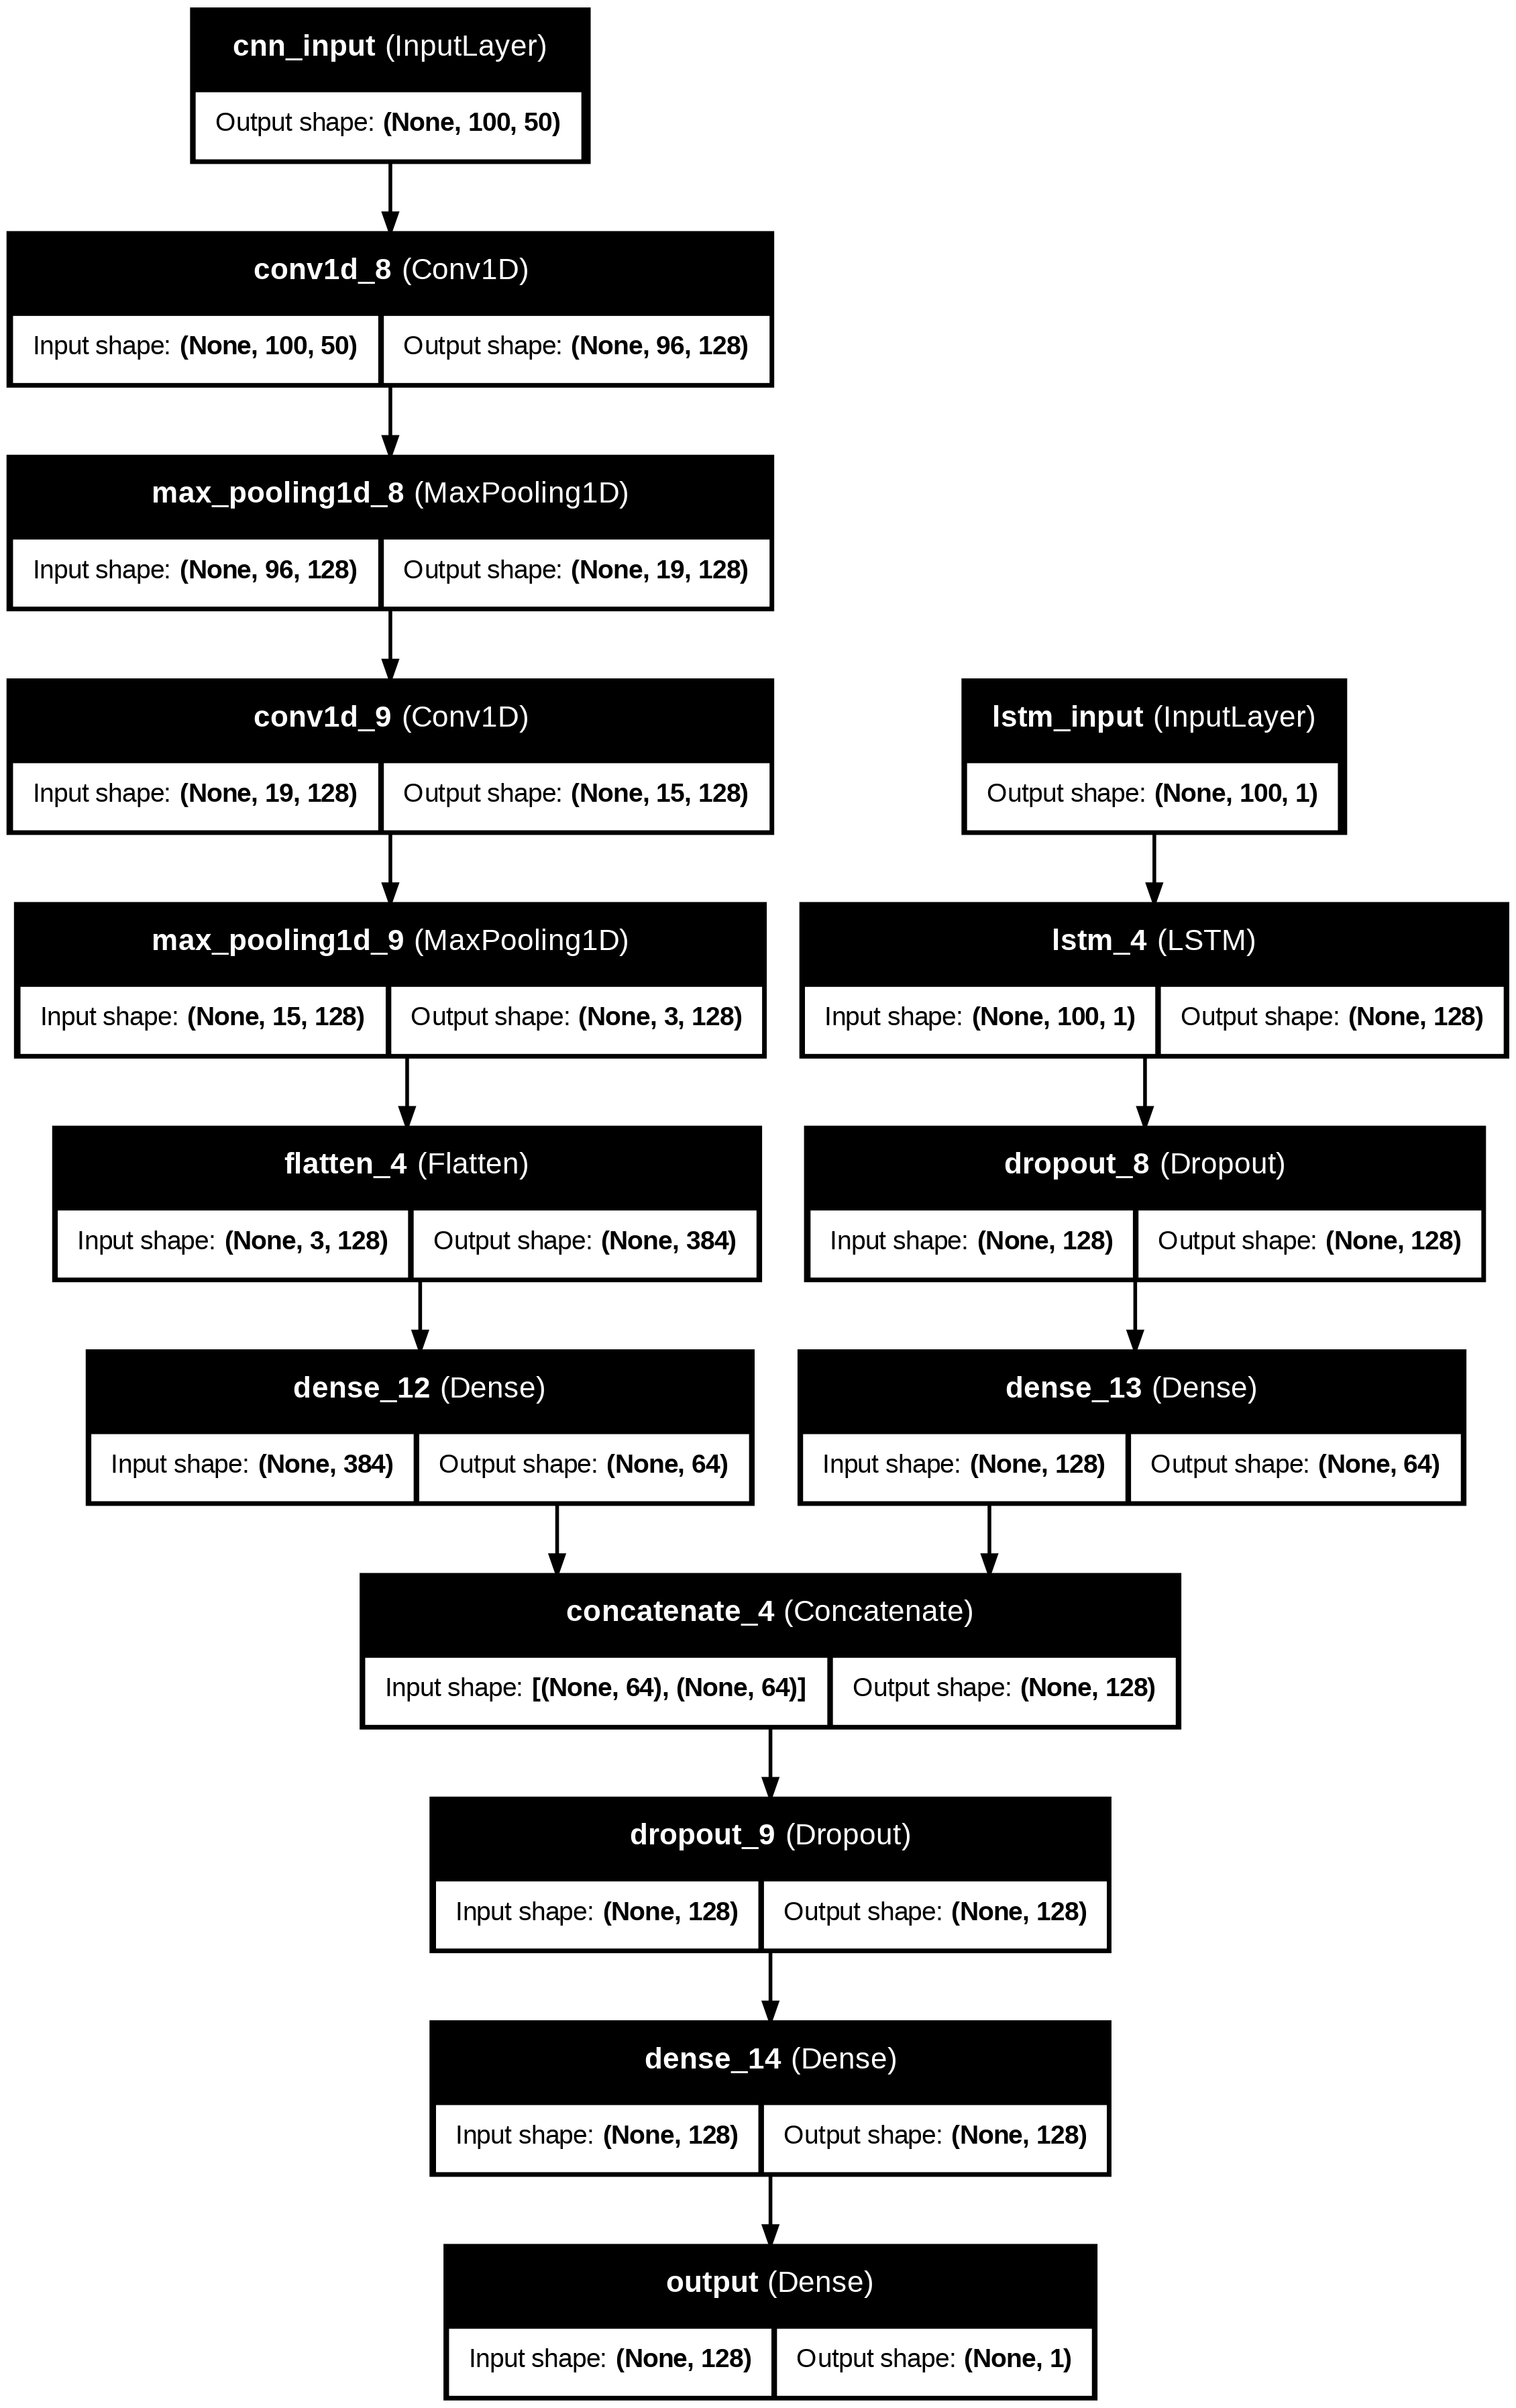

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Dense, Dropout, Flatten, concatenate

# Corrected CNN architecture (for Cyberbullying Text Classification)
cnn_input = Input(shape=(100, 50), name="cnn_input")
conv1d = Conv1D(128, 5, activation='relu')(cnn_input)
max_pooling1d = MaxPooling1D(pool_size=5)(conv1d)
conv1d_1 = Conv1D(128, 5, activation='relu')(max_pooling1d)
max_pooling1d_1 = MaxPooling1D(pool_size=5)(conv1d_1)
flatten = Flatten()(max_pooling1d_1)
dense_1 = Dense(64, activation='relu')(flatten)

# Corrected LSTM architecture (for IGD Sequential Data)
lstm_input = Input(shape=(100, 1), name="lstm_input")
lstm = LSTM(128, activation='tanh', return_sequences=False)(lstm_input)  # Corrected number of units to 128
dropout = Dropout(0.5)(lstm)  # Corrected dropout rate to 0.5
dense = Dense(64, activation='relu')(dropout)

# Concatenate CNN and LSTM outputs
concat = concatenate([dense_1, dense], axis=-1)

# Add more layers after concatenation
dropout_1 = Dropout(0.5)(concat)
dense_2 = Dense(128, activation='relu')(dropout_1)
output = Dense(1, activation='sigmoid', name="output")(dense_2)

# Create the model
model = Model(inputs=[cnn_input, lstm_input], outputs=output)

# Visualize the model architecture with corrected values
plot_model(model, to_file='corrected_deep_learning_architecture.png', show_shapes=True, show_layer_names=True)
